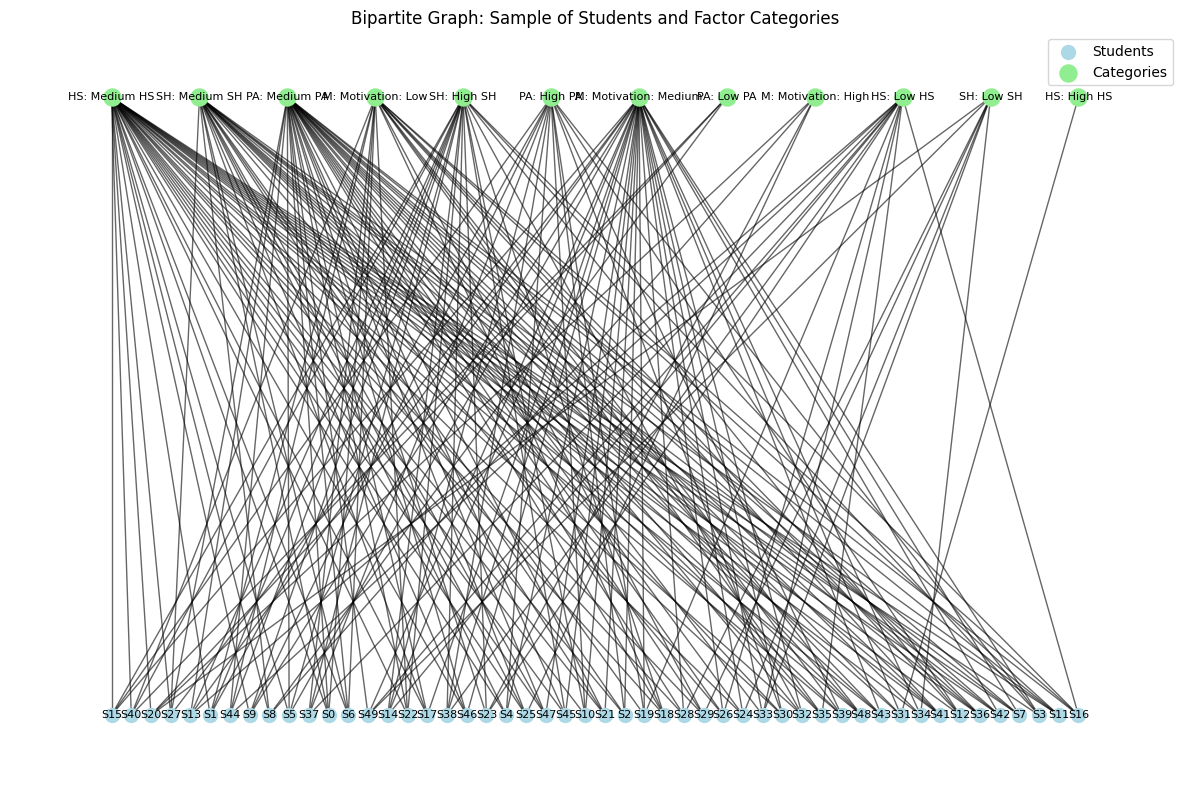

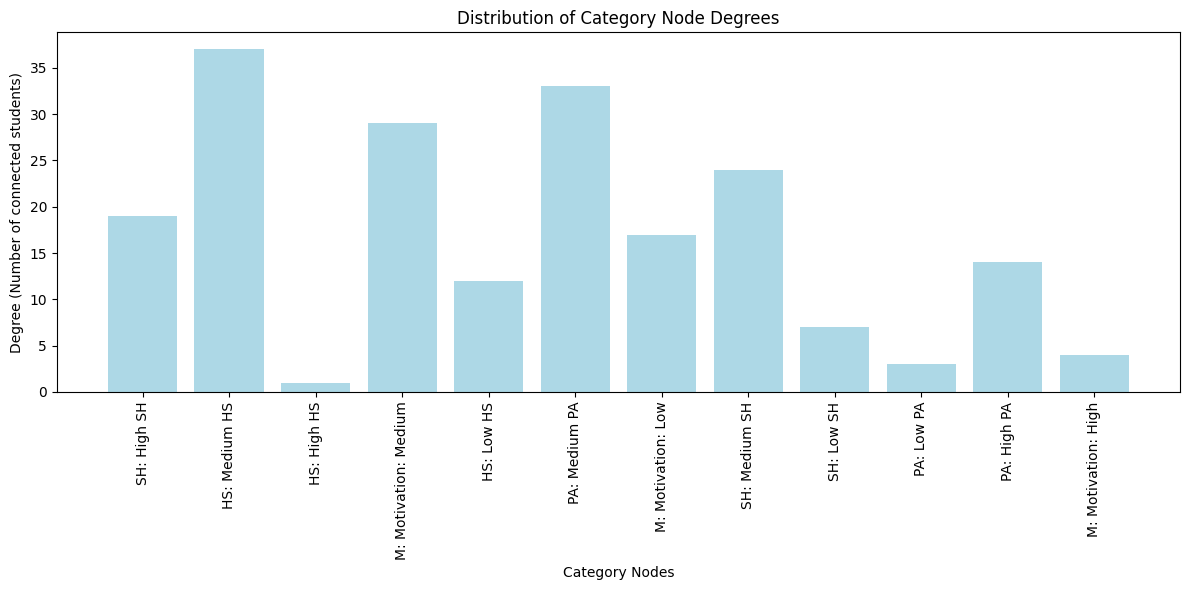

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('StudentPerformanceFactors.csv')

max_hours = df['Hours_Studied'].max()
df['Hours_Studied_bin'] = pd.cut(df['Hours_Studied'],
                                 bins=[0, 15, 30, max_hours + 1],
                                 labels=['Low HS', 'Medium HS', 'High HS'],
                                 right=False)

max_sleep = df['Sleep_Hours'].max()
df['Sleep_Hours_bin'] = pd.cut(df['Sleep_Hours'],
                               bins=[0, 6, 8, max_sleep + 1],
                               labels=['Low SH', 'Medium SH', 'High SH'],
                               right=False)

max_activity = df['Physical_Activity'].max()
df['Physical_Activity_bin'] = pd.cut(df['Physical_Activity'],
                                     bins=[0, 2, 4, max_activity + 1],
                                     labels=['Low PA', 'Medium PA', 'High PA'],
                                     right=False)

df['Motivation_bin'] = 'Motivation: ' + df['Motivation_Level'].astype(str)

df_sample = df.iloc[:50]

B = nx.Graph()

for idx, row in df_sample.iterrows():
    student_node = f"S{idx}"
    B.add_node(student_node, bipartite=0, exam_score=row['Exam_Score'])
    factors = {
        'HS':row['Hours_Studied_bin'],
        'SH':row['Sleep_Hours_bin'],
        'PA':row['Physical_Activity_bin'],
        'M':row['Motivation_bin']
    }
    for factor, category in factors.items():
        category_node = f"{factor}: {category}"
        B.add_node(category_node, bipartite=1)
        B.add_edge(student_node, category_node)

student_nodes = {n for n, d in B.nodes(data=True) if d.get('bipartite') == 0}
category_nodes = set(B) - student_nodes

pos = nx.bipartite_layout(B, student_nodes, align='horizontal')

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(B, pos, nodelist=student_nodes, node_color='lightblue', node_size=100, label='Students')
nx.draw_networkx_nodes(B, pos, nodelist=category_nodes, node_color='lightgreen', node_size=150, label='Categories')
nx.draw_networkx_edges(B, pos, alpha=0.6)
nx.draw_networkx_labels(B, pos, font_size=8)
plt.title("Bipartite Graph: Sample of Students and Factor Categories")
plt.axis('off')
plt.tight_layout()
plt.legend(scatterpoints=1)
plt.show()

category_degrees = {node: B.degree(node) for node in category_nodes}

plt.figure(figsize=(12, 6))
plt.bar(category_degrees.keys(), category_degrees.values(), color='lightblue')
plt.xticks(rotation=90)
plt.xlabel('Category Nodes')
plt.ylabel('Degree (Number of connected students)')
plt.title('Distribution of Category Node Degrees')
plt.tight_layout()
plt.show()
